In [1]:
from lib import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
x = np.load('data/x.npy')
y = np.load('data/y.npy')

# Walk Forward Optimization

Backtest of strategy will be as follows:

- `DAYS`: the number of instances that will be used to train the learning model
- `WINDOW`: the number of past periods' features included as features to be trained

In this notebook, we will train the model based on the past 5 days features with 30 instances on the USD/JPY currency pair.

In [3]:
DAYS = 30
WINDOW = 5
x_transformed = np.empty(shape=(x.shape[0] - WINDOW + 1,0))
for i in range(x.shape[1]):
    x_transformed = np.concatenate((x_transformed, 
                                    utils.rolling_window(x[:,i], WINDOW)), 
                                   axis=1)
y_transformed = y[WINDOW-1:]

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

for alpha in [0.01, 0.03, 0.1, 0.3, 1, 3, 10]:
    lr = Lasso(alpha)
    returns = np.array(())
    for i in range(x_transformed.shape[0]-DAYS):
        x_train = x_transformed[i:i+DAYS,:]
        jpy_train = y_transformed[i:i+DAYS,5]   
        lr.fit(x_train, jpy_train)
        returns = np.concatenate((returns,
                                  lr.predict(x_transformed[i+DAYS,:].reshape(1,-1))))
    utils.plotDailyStrategy(returns, y_transformed[DAYS:, 5], hold_on=True)
plt.show()

# Support Vector Machine
Using classification of the direction of fx as a strategy. Now, instead of feeding the target as a continuous-valued vector, we change it into categorical +1 or -1.

Apparently only USD/JPY worked well with the SVR strategy.

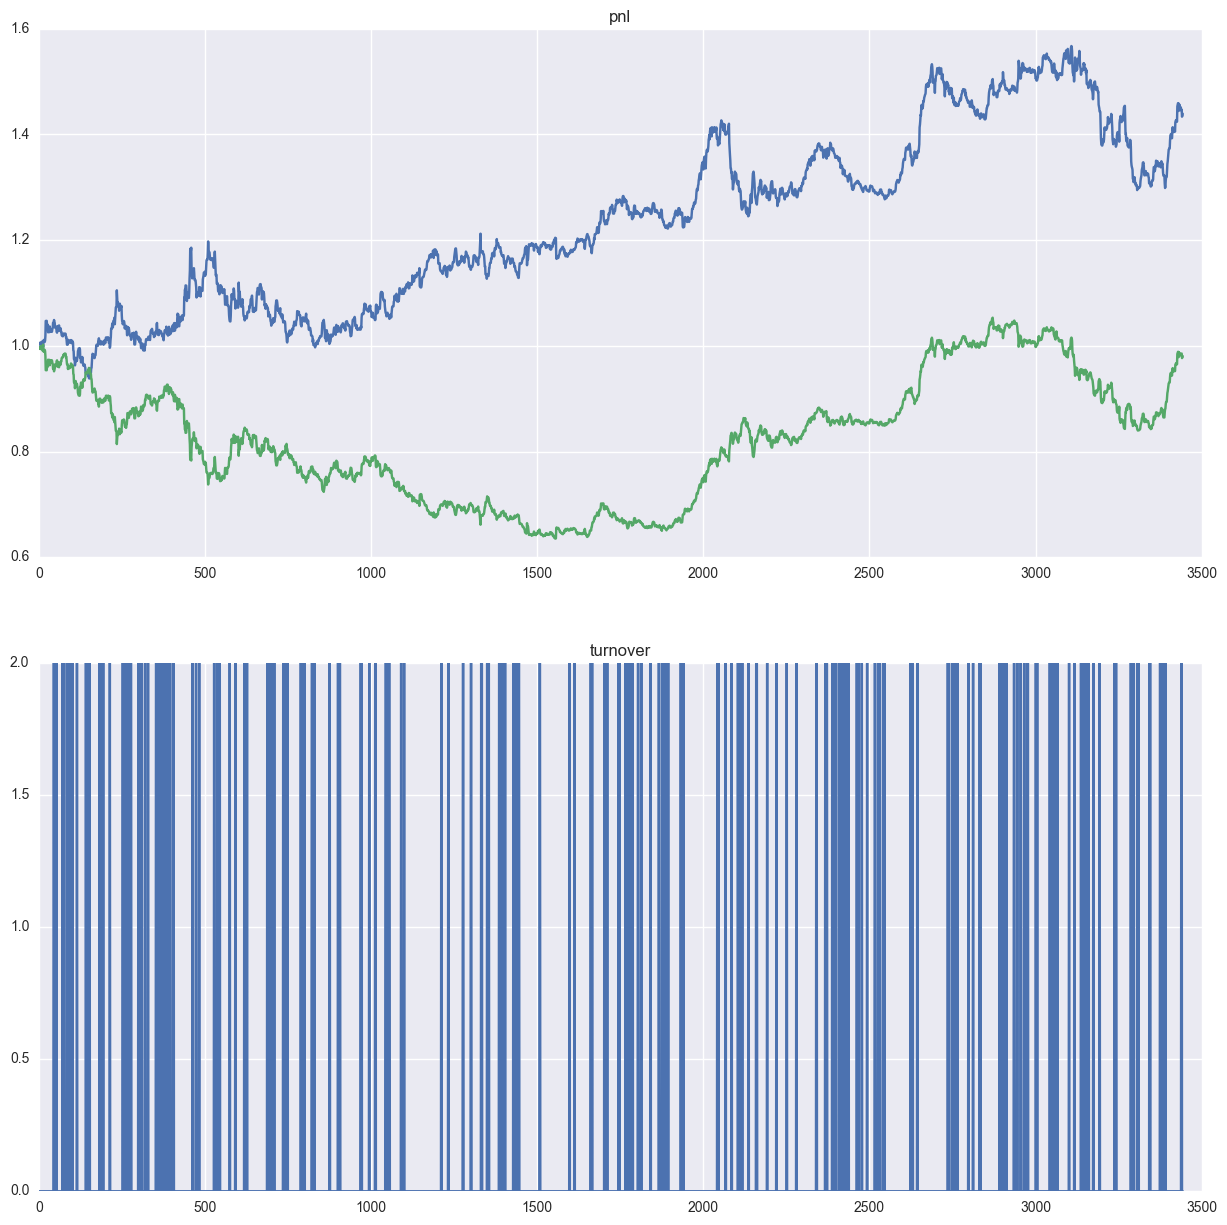

   frequency  turnover ratio
0       3169             0.0
1        275             2.0
Correct direction: 0.509582


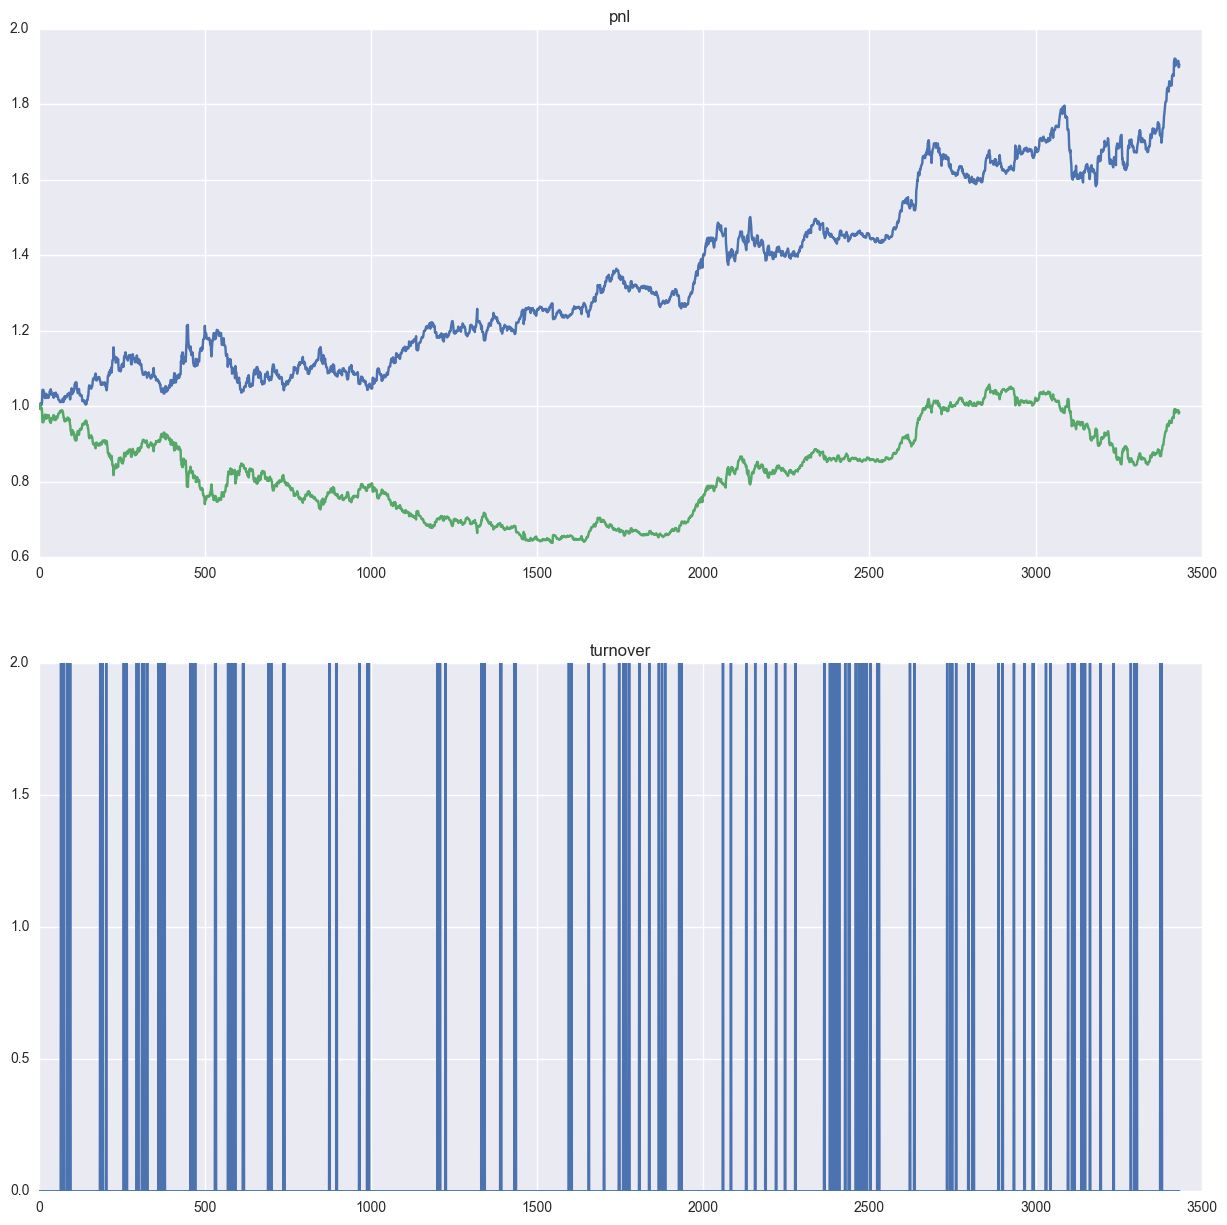

   frequency  turnover ratio
0       3275             0.0
1        159             2.0
Correct direction: 0.503786


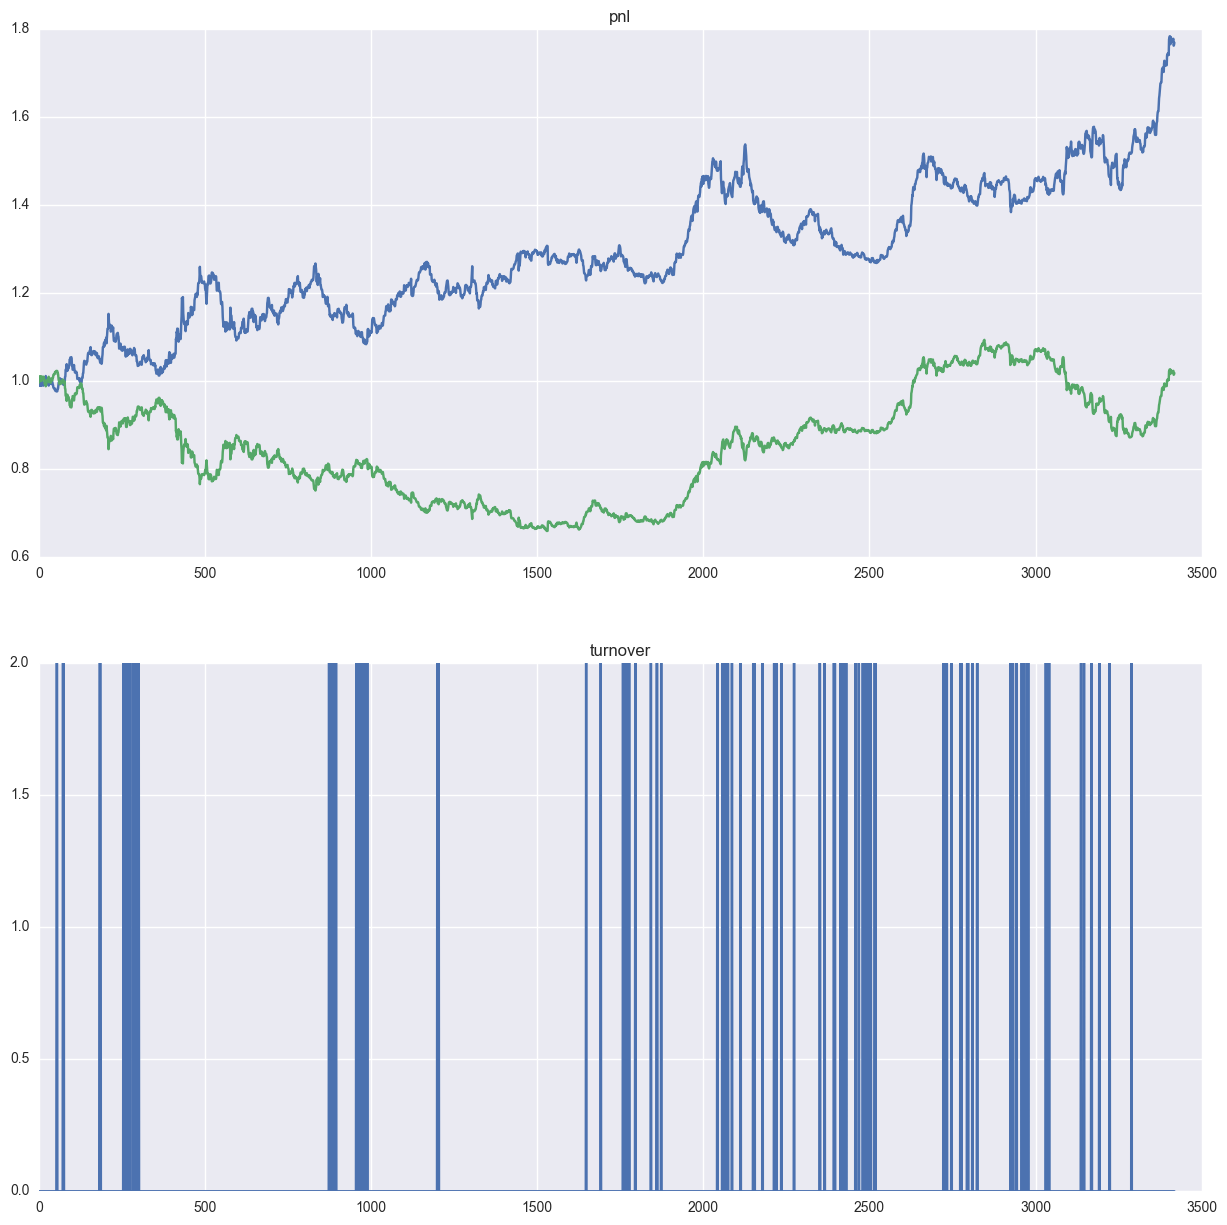

   frequency  turnover ratio
0       3288             0.0
1        131             2.0
Correct direction: 0.491957


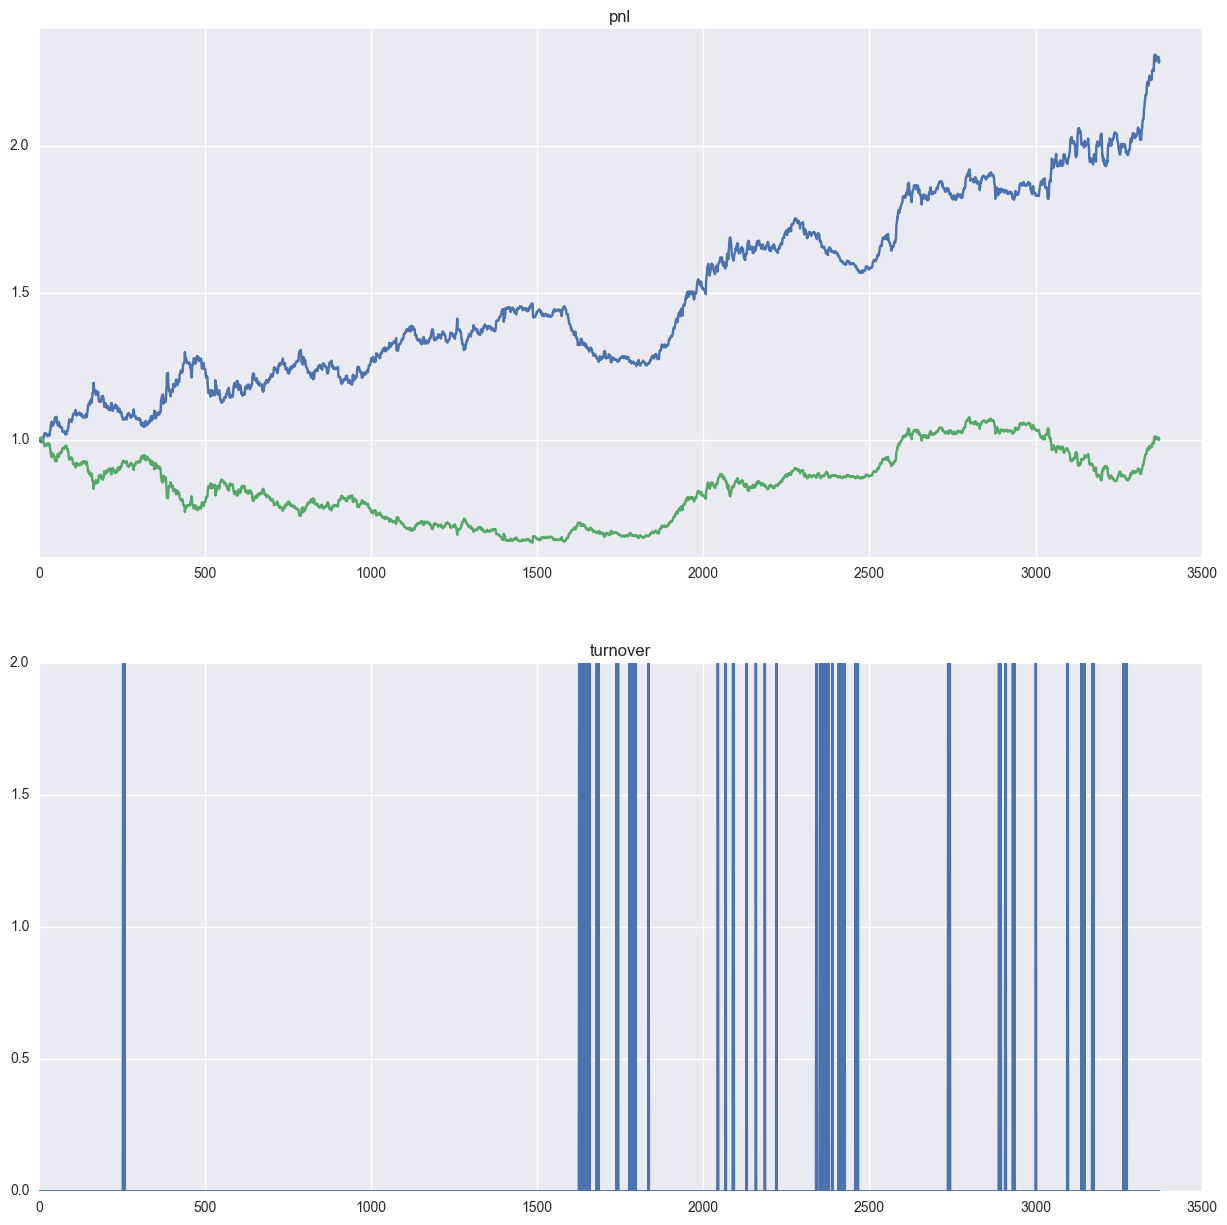

   frequency  turnover ratio
0       3307             0.0
1         67             2.0
Correct direction: 0.491701


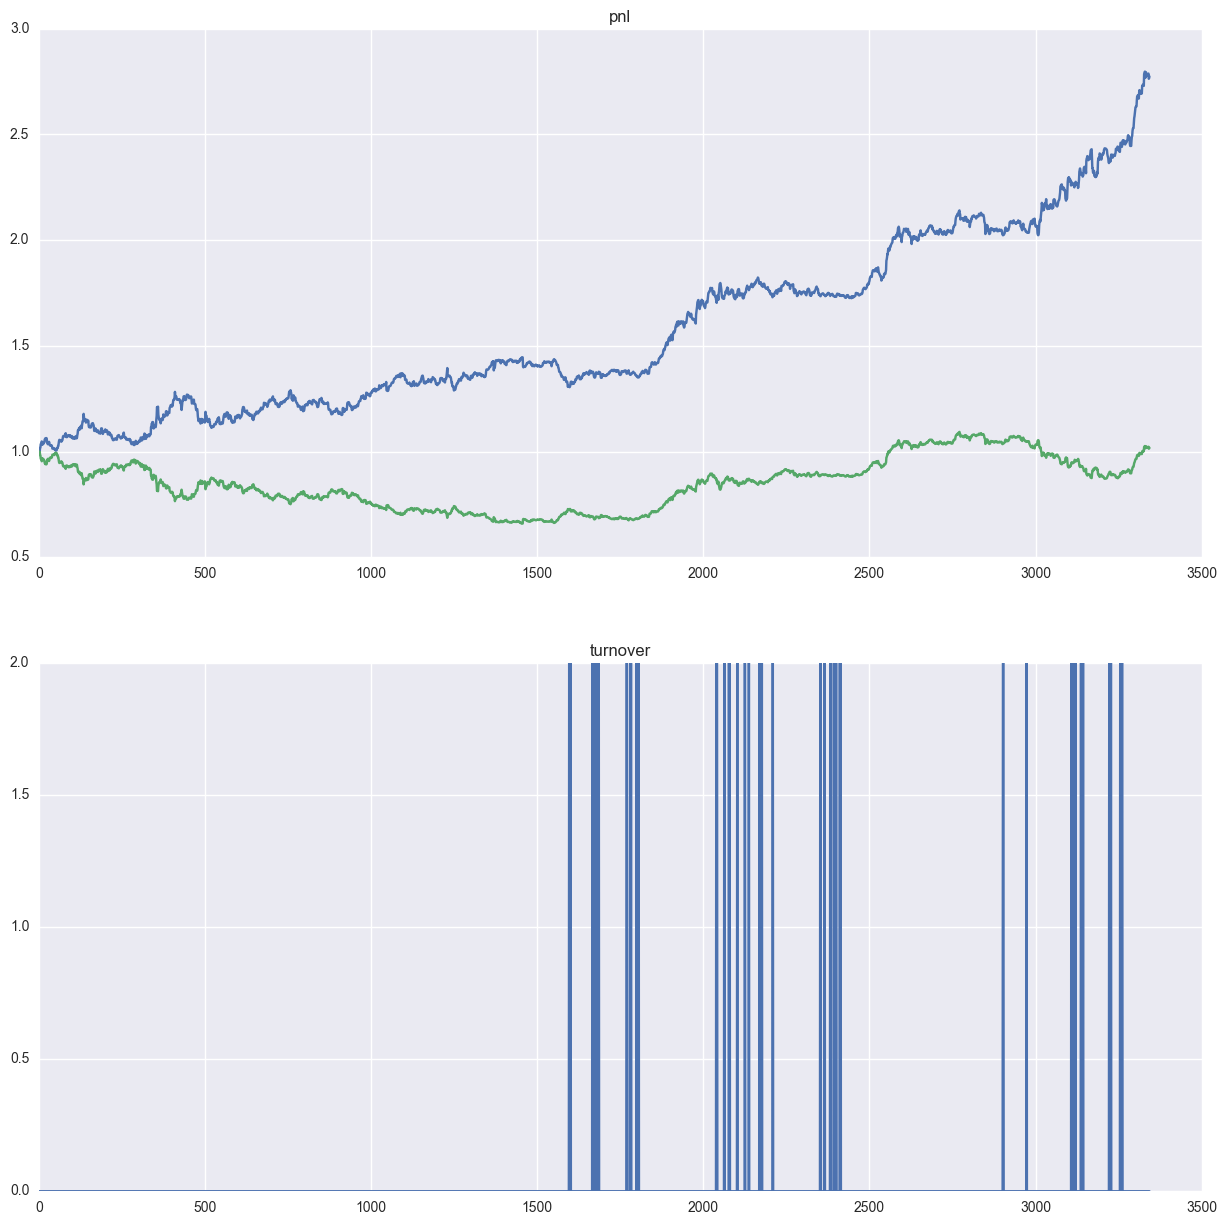

   frequency  turnover ratio
0       3291             0.0
1         53             2.0
Correct direction: 0.498505


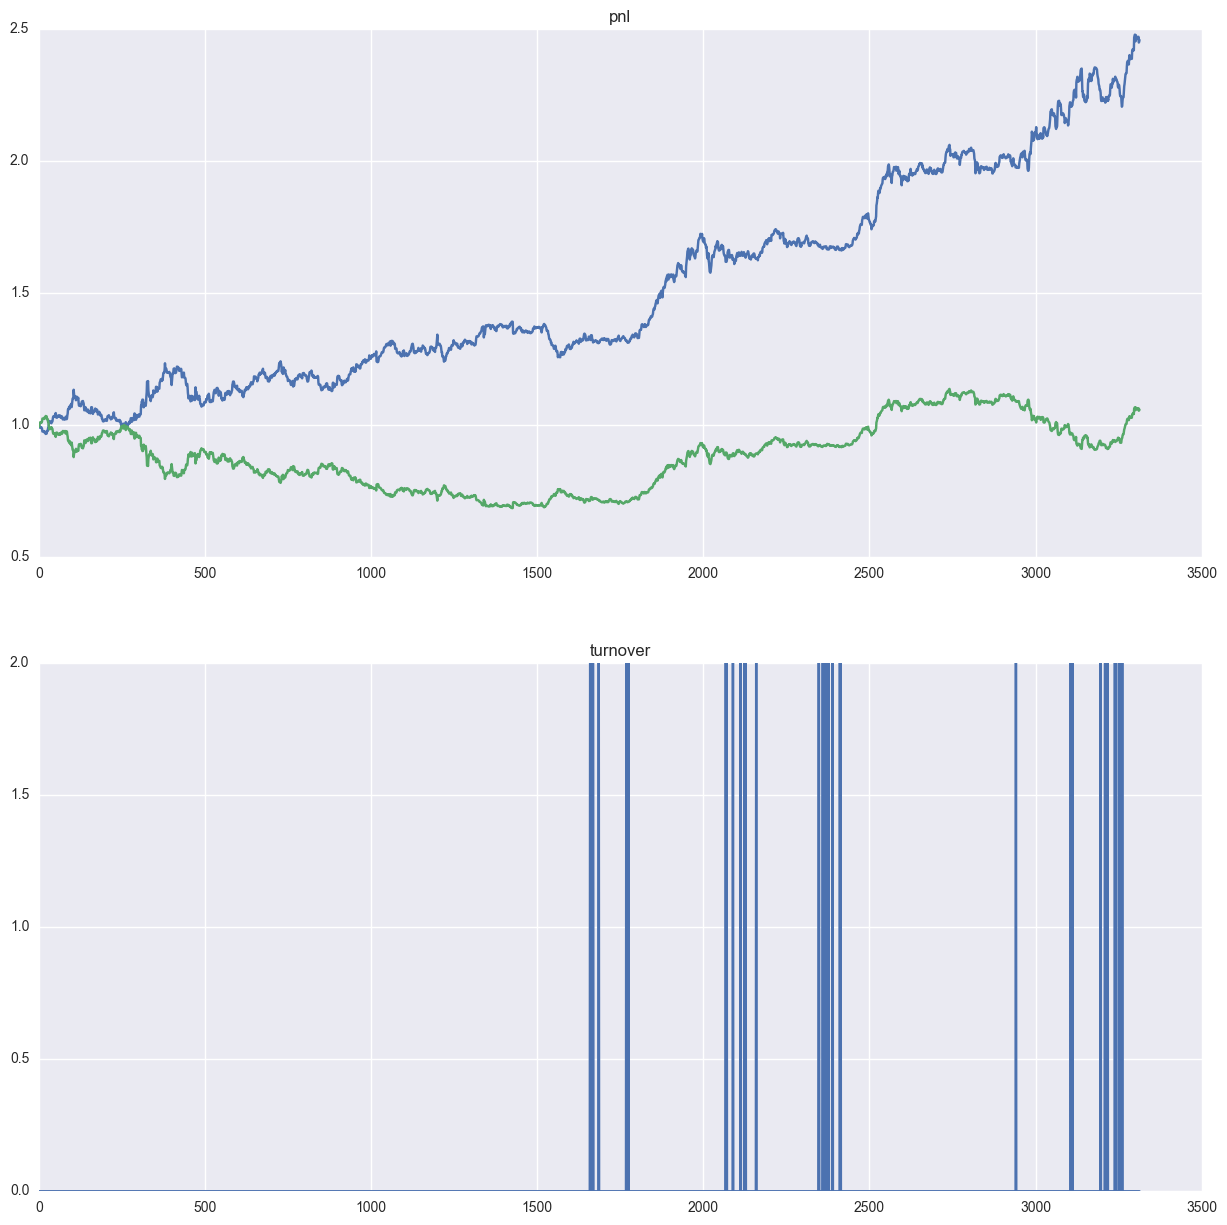

   frequency  turnover ratio
0       3273             0.0
1         41             2.0
Correct direction: 0.500905


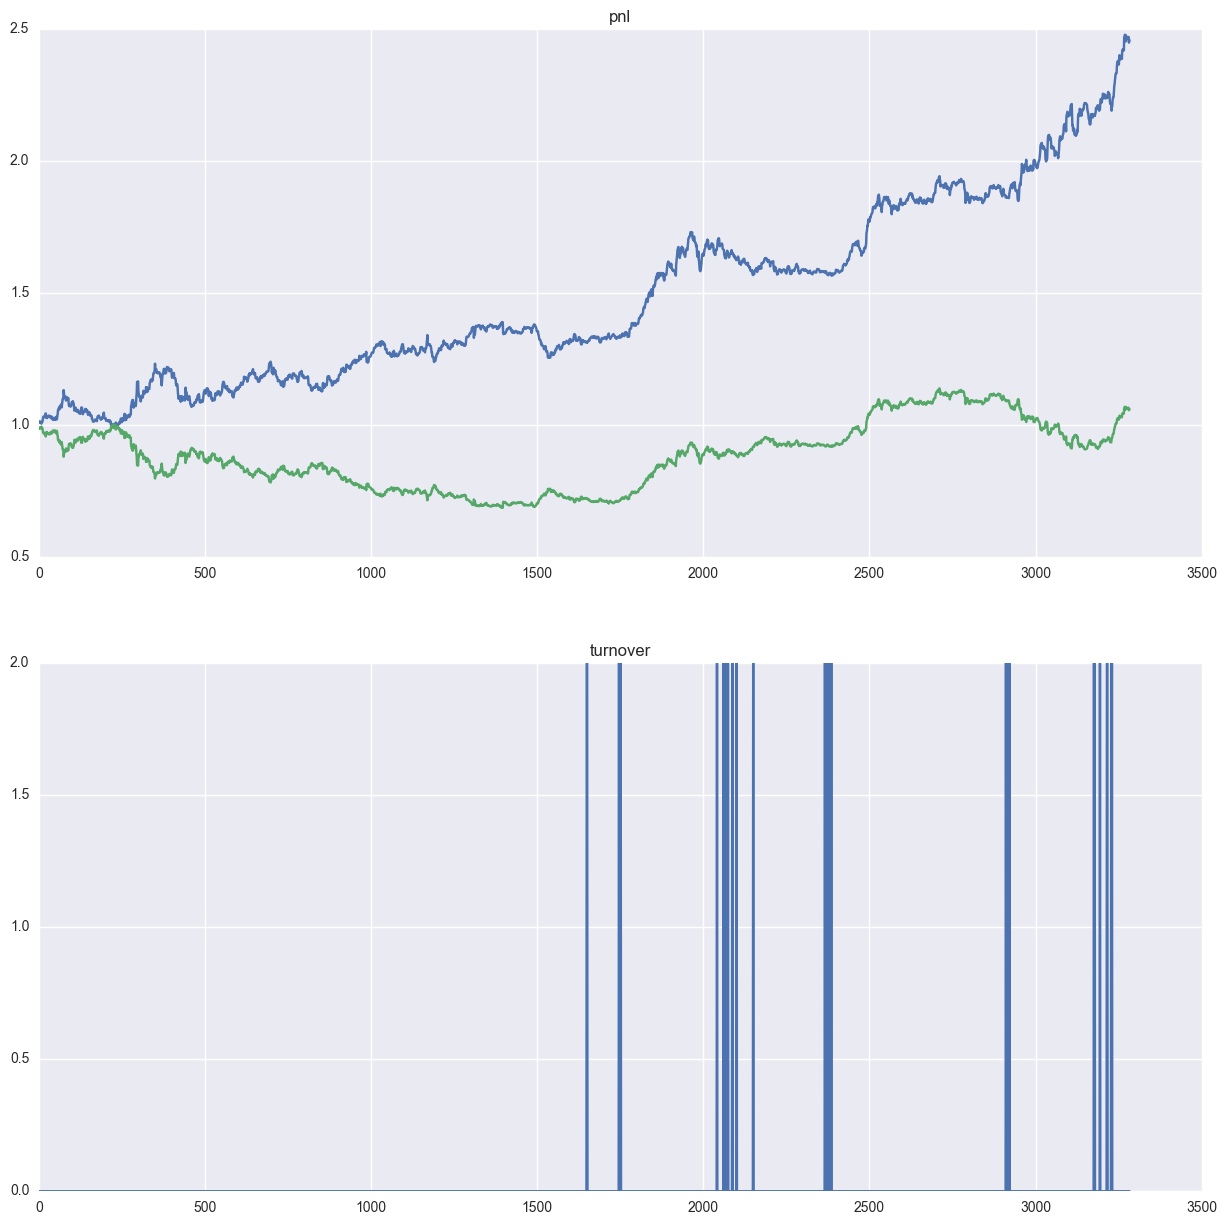

   frequency  turnover ratio
0       3255             0.0
1         29             2.0
Correct direction: 0.496955


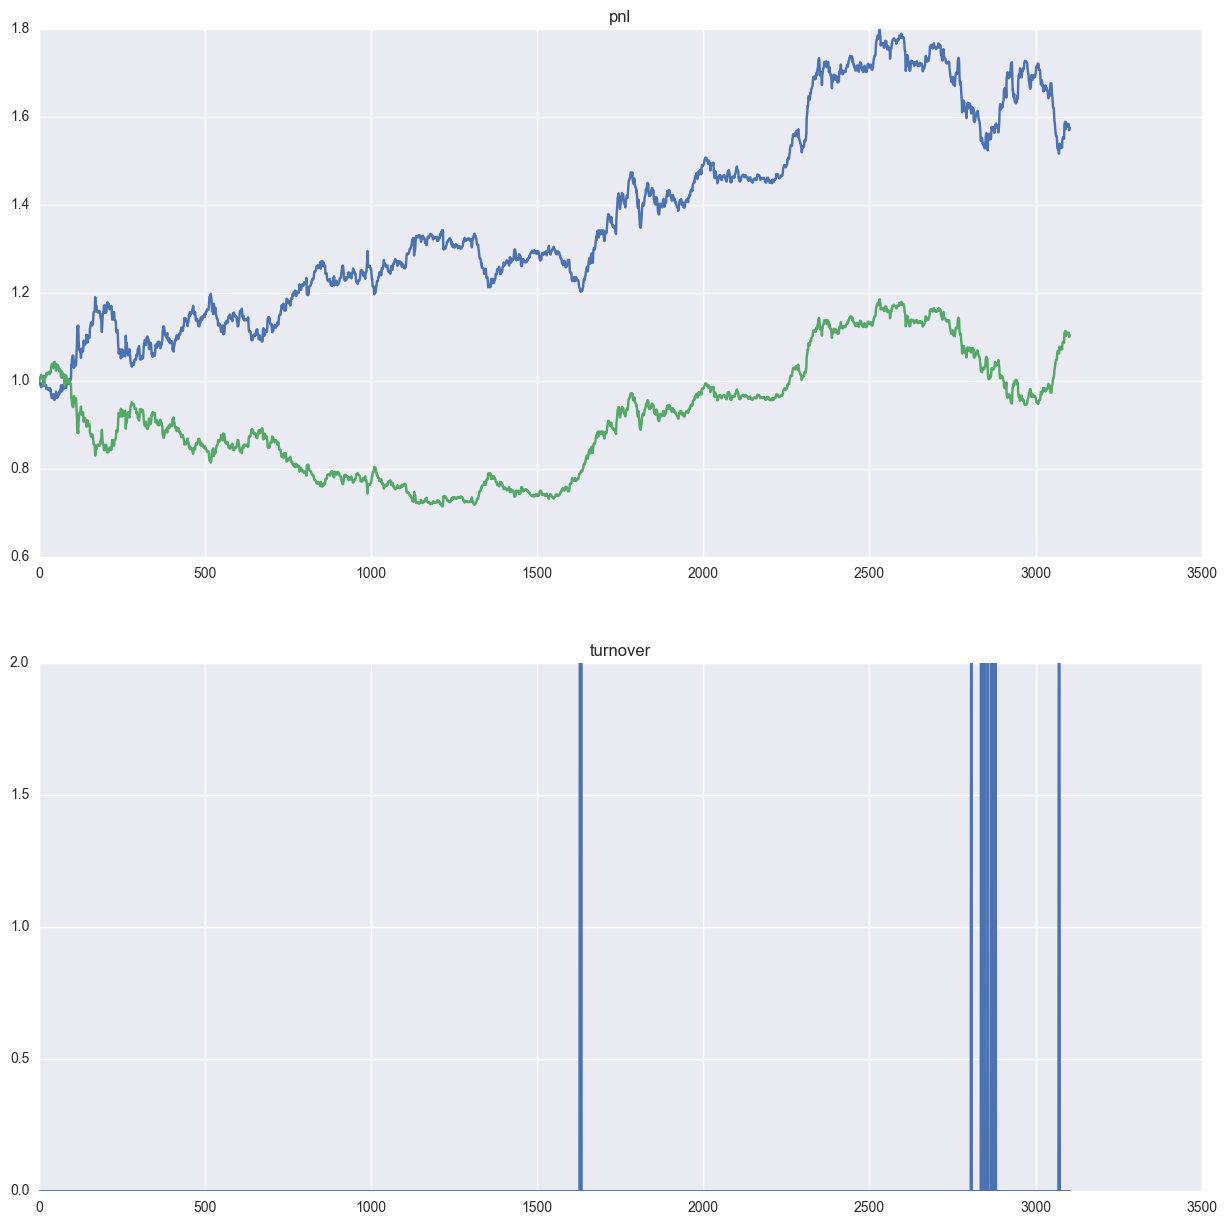

   frequency  turnover ratio
0       3087             0.0
1         17             2.0
Correct direction: 0.495490


In [4]:
from sklearn.svm import SVC

svc = SVC()

for DAYS in [20, 30, 45, 90, 120, 150, 180, 360]:
    svc = SVC(kernel='rbf')
    returns = np.array(())
    for i in range(x_transformed.shape[0]-DAYS):
        x_train = x_transformed[i:i+DAYS,:]
        jpy_train = np.where(y_transformed[i:i+DAYS,5] > 0, 1, -1)  
        svc.fit(x_train, jpy_train)
        returns = np.concatenate((returns,
                                  svc.predict(x_transformed[i+DAYS,:].reshape(1,-1))))
    utils.plotDailyStrategy(returns, y_transformed[DAYS:, 5], margin=1)

Try support vector machine on USD/CAD

In [ ]:
for DAYS in [20, 30, 45, 90, 120, 150, 180, 360]:
    svc = SVC(kernel='rbf')
    returns = np.array(())
    for i in range(x_transformed.shape[0]-DAYS):
        x_train = x_transformed[i:i+DAYS,:]
        jpy_train = np.where(y_transformed[i:i+DAYS,0] > 0, 1, -1)  
        svc.fit(x_train, jpy_train)
        returns = np.concatenate((returns,
                                  svc.predict(x_transformed[i+DAYS,:].reshape(1,-1))))
    utils.plotDailyStrategy(returns, y_transformed[DAYS:, 0])

Try support vector machine on USD/EUR

In [ ]:
for DAYS in [20, 30, 45, 90, 120, 150, 180, 360]:
    svc = SVC(kernel='rbf')
    returns = np.array(())
    for i in range(x_transformed.shape[0]-DAYS):
        x_train = x_transformed[i:i+DAYS,:]
        jpy_train = np.where(y_transformed[i:i+DAYS,3] > 0, 1, -1)  
        svc.fit(x_train, jpy_train)
        returns = np.concatenate((returns,
                                  svc.predict(x_transformed[i+DAYS,:].reshape(1,-1))))
    utils.plotDailyStrategy(returns, y_transformed[DAYS:, 3])

# Random Forests Classification

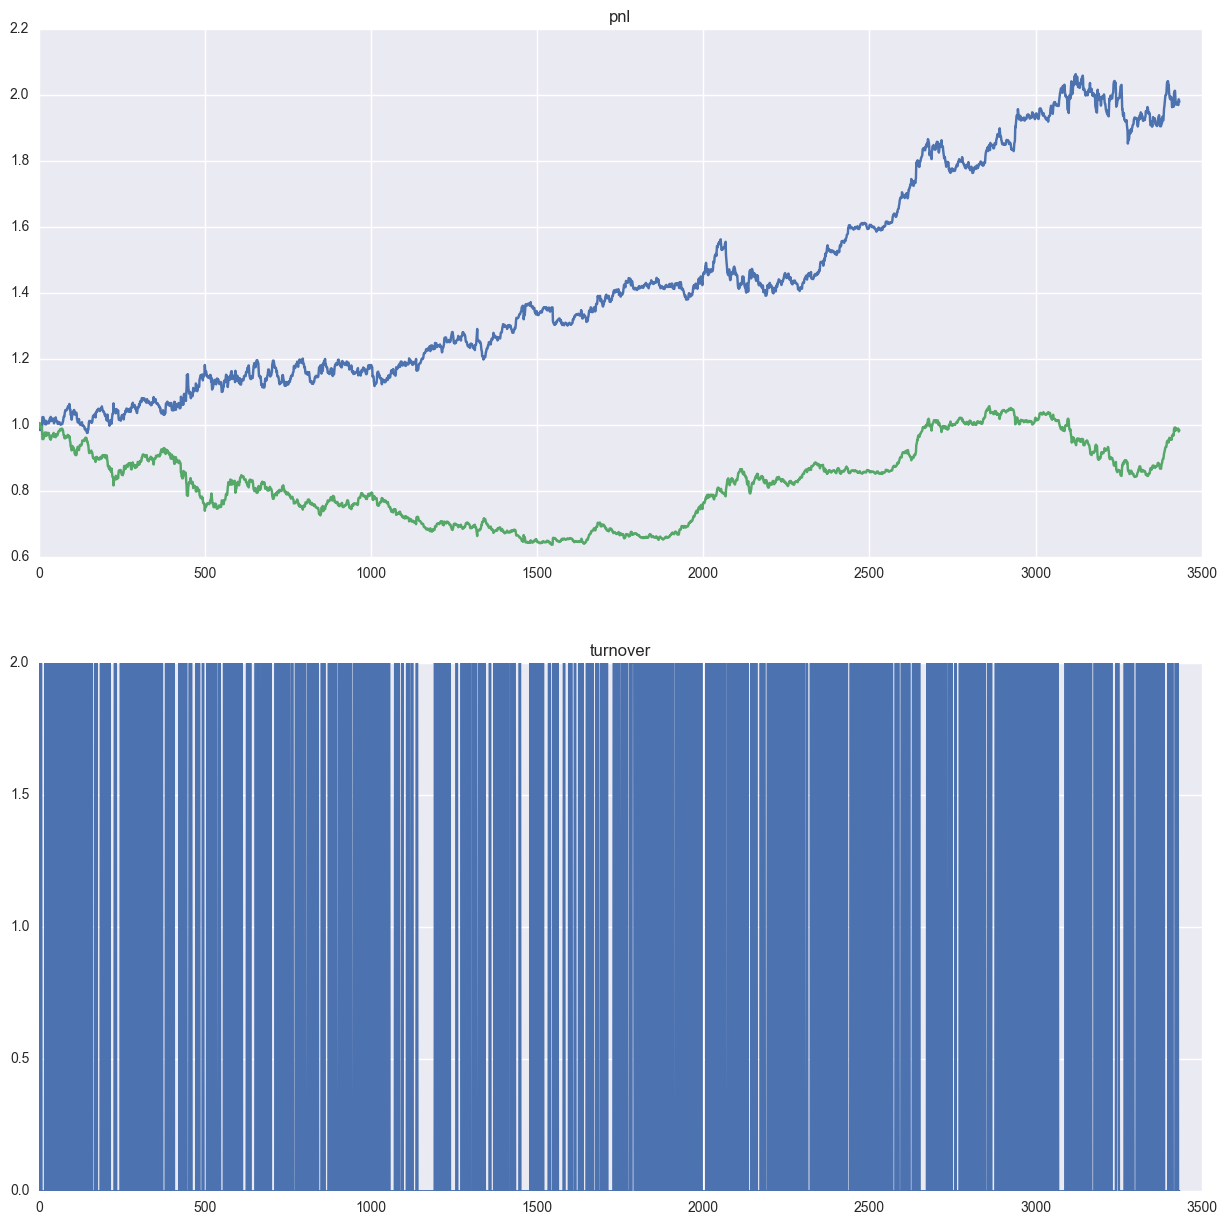

   frequency  turnover ratio
0       2226             0.0
1       1208             2.0
Correct direction: 0.501456


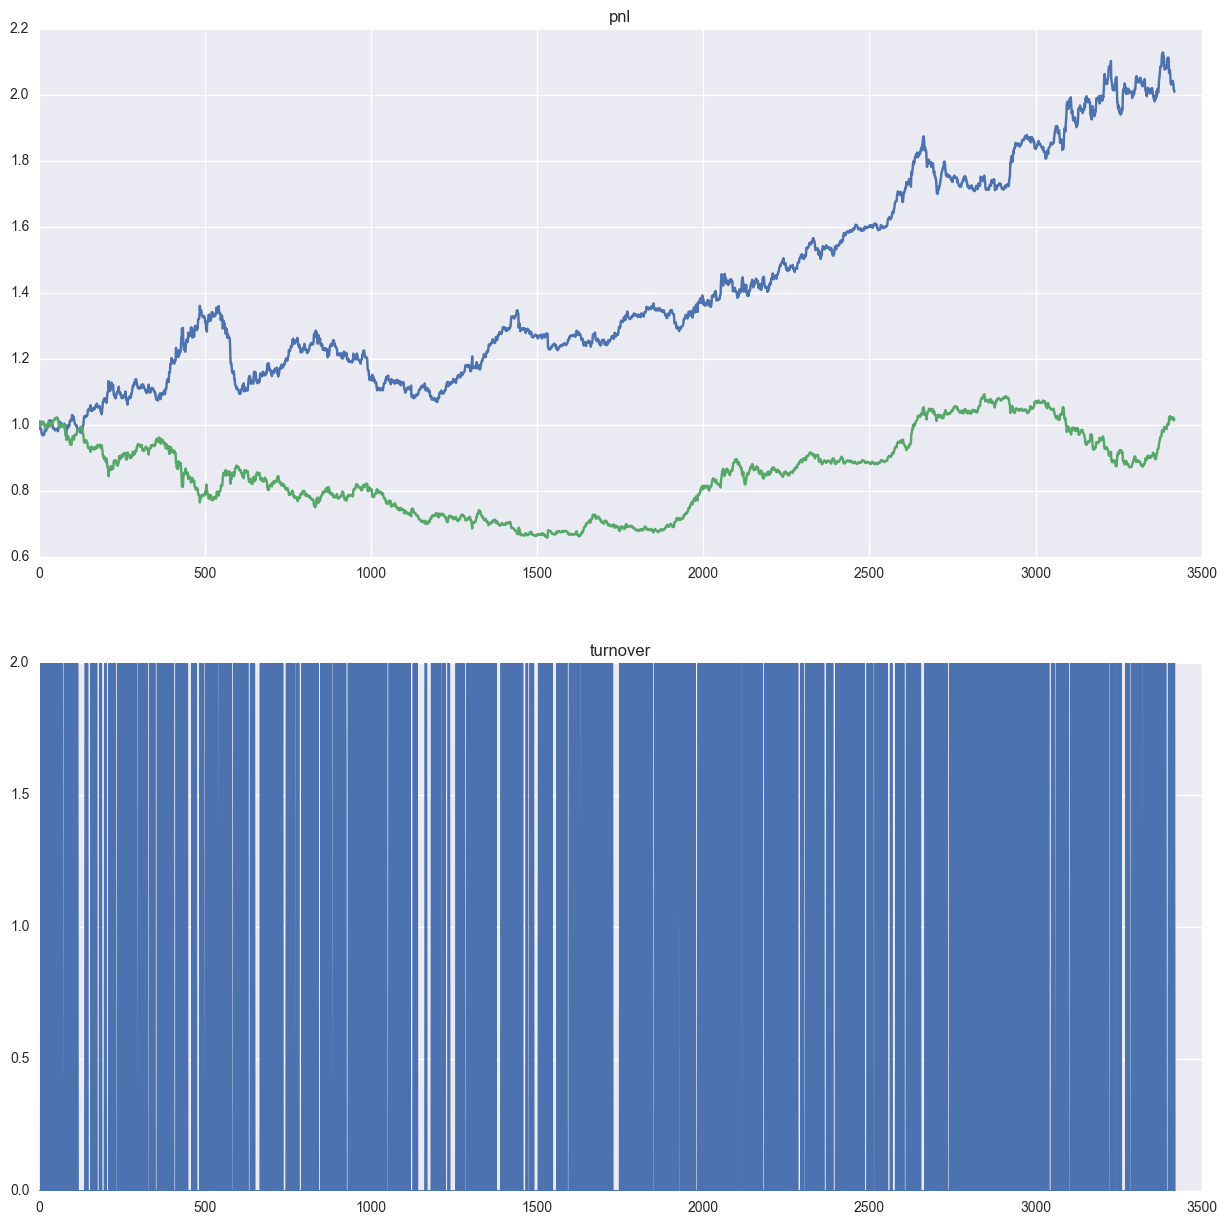

   frequency  turnover ratio
0       2161             0.0
1       1258             2.0
Correct direction: 0.503364


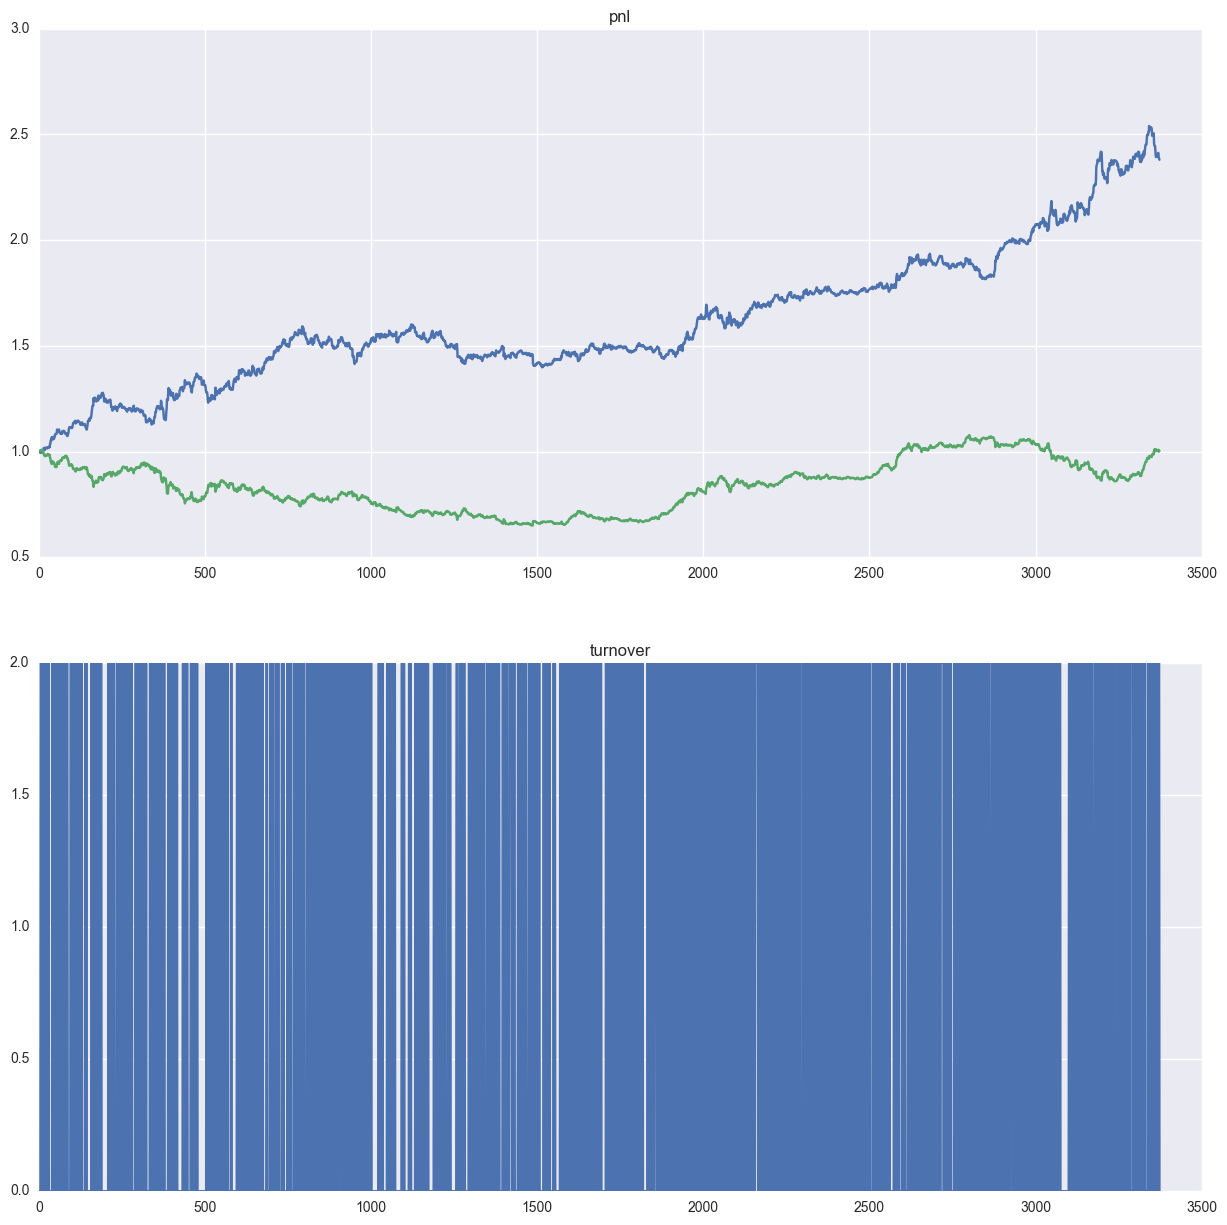

   frequency  turnover ratio
0       2072             0.0
1       1302             2.0
Correct direction: 0.502075


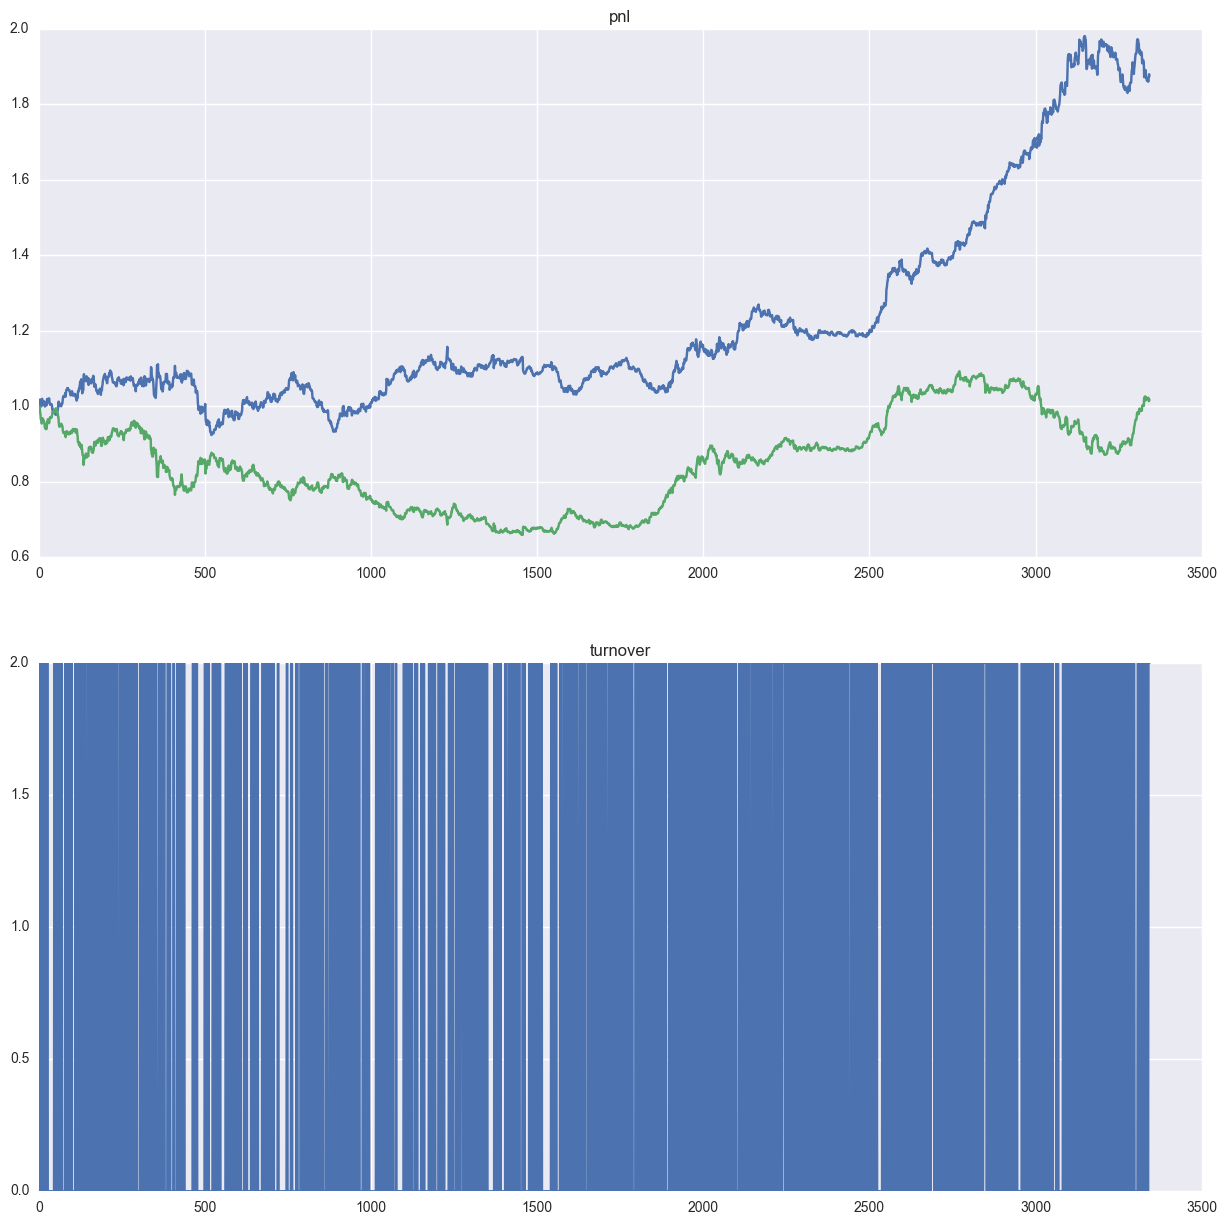

   frequency  turnover ratio
0       2060             0.0
1       1284             2.0
Correct direction: 0.496411


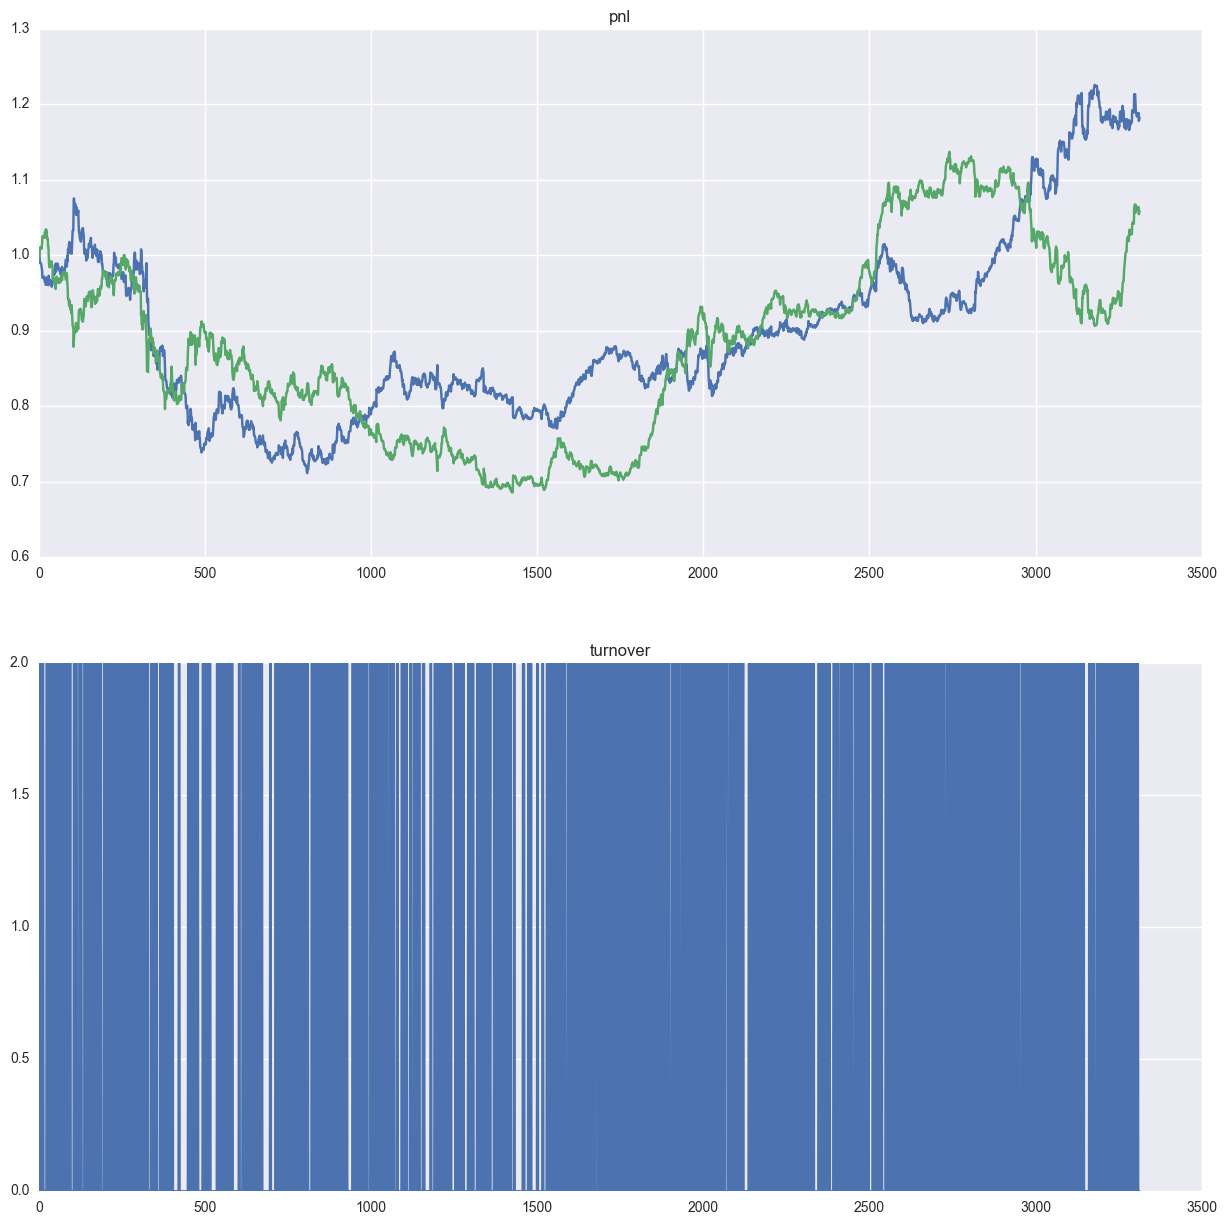

   frequency  turnover ratio
0       2063             0.0
1       1251             2.0
Correct direction: 0.494870


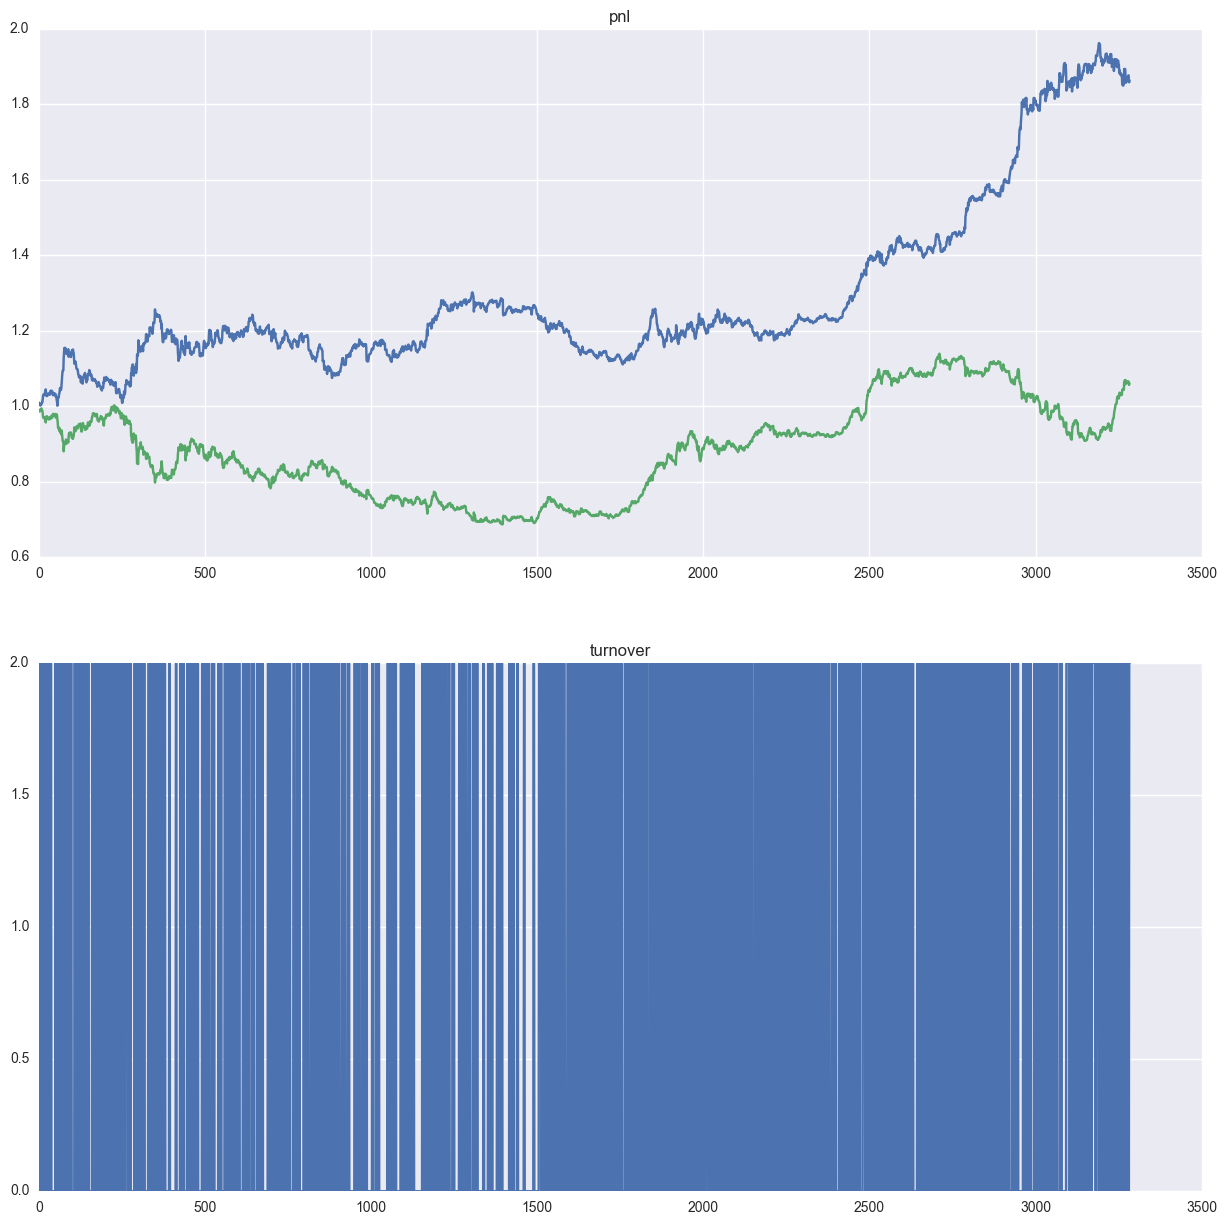

   frequency  turnover ratio
0       2017             0.0
1       1267             2.0
Correct direction: 0.493301


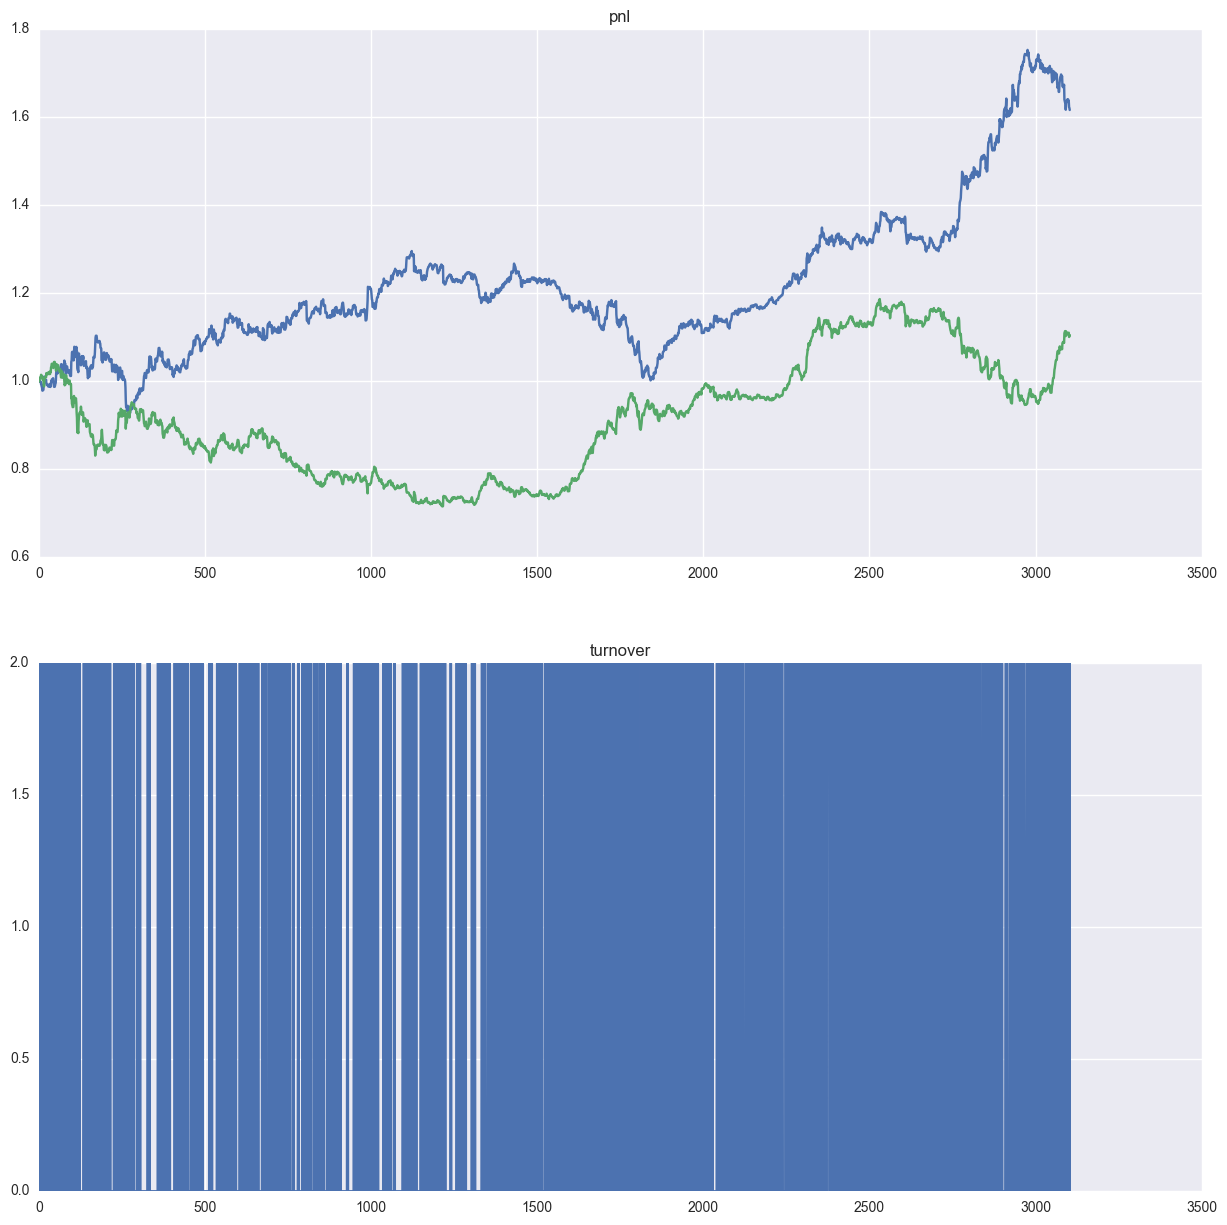

   frequency  turnover ratio
0       1885             0.0
1       1219             2.0
Correct direction: 0.493557


In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

for DAYS in [30, 45, 90, 120, 150, 180, 360]:
    returns = np.array(())
    for i in range(x_transformed.shape[0]-DAYS):
        x_train = x_transformed[i:i+DAYS,:]
        jpy_train = np.where(y_transformed[i:i+DAYS,5] > 0, 1, -1)  
        forest.fit(x_train, jpy_train)
        returns = np.concatenate((returns,
                                  forest.predict(x_transformed[i+DAYS,:].reshape(1,-1))))
    utils.plotDailyStrategy(returns, y_transformed[DAYS:, 5])

# Why despite 50% of correct classification we can still make money?

Check the average returns of those correctly classified vs incorrectly classified.

In [26]:
sum((returns < 0) == (y_transformed[DAYS:, 5] < 0))/len(returns)

0.4954896907216495

In [43]:
 y_transformed[DAYS:, 5][(y_transformed[DAYS:,5] < 0) == (returns < 0)].shape

(1538,)

In [44]:
 y_transformed[DAYS:, 5][(y_transformed[DAYS:,5] < 0) != (returns < 0)].shape

(1566,)